In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
############Snakes and Ladders without the snakes or ladders#####################

In [3]:
# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

# House rules: you don't need to land on 100, just reach it.
T[95:100,100] += np.linspace(1/6, 5/6, 5)

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1
print(T)

[[0.         0.16666667 0.16666667 ... 0.         0.         0.        ]
 [0.         0.         0.16666667 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.16666667 0.83333333]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [4]:
n, P = 0, []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    cumulative_prob += P[-1]
mode = np.argmax(P)+1
print('modal number of moves:', mode)

modal number of moves: 29


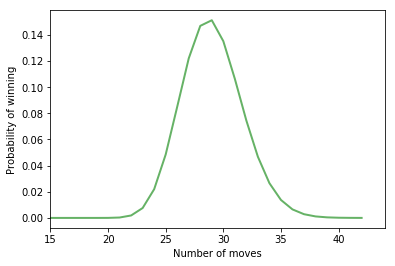

In [5]:
# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots()
ax.plot(np.linspace(1,n,n), P, 'g', lw=2, alpha=0.6)
ax.set_xlim(15)
ax.set_xlabel('Number of moves')
ax.set_ylabel('Probability of winning')

plt.show()

In [6]:
############Snakes and Ladders with the snakes or ladders#####################

In [4]:
ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
           (53,74), (63,86), (76,91), (84,98)]
snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
          (47,26), (83,39), (92,75), (99,70)]
trans = ladders + snakes

In [9]:
# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

for (i1,i2) in trans:
    print(i1,i2)
    print(T[:,i1])
    iw = np.where(T[:,i1] > 0)
    print(T[iw,i2])
    T[:,i1] = 0
    print('---------------')
    print(T[:,i1])
    T[iw,i2] += 1/6
    
    print(T[iw,i2])

3 19
[0.16666667 0.16666667 0.16666667 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.    

In [6]:
# House rules: you don't need to land on 100, just reach it.
T[95:100,100] += np.linspace(1/6, 5/6, 5)
for snake in snakes:
    T[snake,100] = 0

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1
print(T)

[[0.         0.16666667 0.16666667 ... 0.         0.         0.        ]
 [0.         0.         0.16666667 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.83333333]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [10]:
n, P = 0, []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    cumulative_prob += P[-1]
mode = np.argmax(P)+1
print('modal number of moves:', mode)

modal number of moves: 19


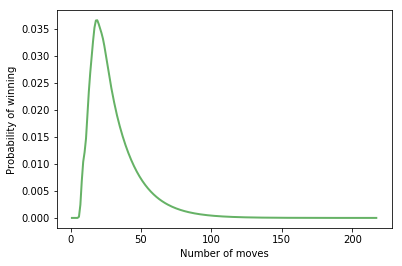

In [11]:
# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots()
ax.plot(np.linspace(1,n,n), P, 'g-', lw=2, alpha=0.6, label='Markov')
ax.set_xlabel('Number of moves')
ax.set_ylabel('Probability of winning')

plt.show()